### **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
import cv2
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D , Convolution2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
from sklearn import metrics
from io import BytesIO 
import seaborn as sns; sns.set()
import tensorflow
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import cohen_kappa_score , matthews_corrcoef , classification_report , roc_auc_score , accuracy_score
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


### **Sample Image from COVID dataset**

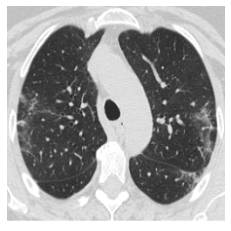

In [3]:
img = plt.imread("/content/drive/My Drive/dataset_pr/COVID/Covid (1).png")
img = cv2.resize(img,(224,224))
plt.imshow(img)
plt.axis("off")
plt.show()

### **Labelling Images for Classification**

In [4]:
x_ = list()
y = list()
IMG_SIZE = 224
c = 0
nc = 0
for i in os.listdir("/content/drive/My Drive/dataset_pr/COVID"):
    try:
        path = "/content/drive/My Drive/dataset_pr/COVID/"+i
        #print('1')
        img = cv2.imread(path)
        img_ = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        img_arr = np.asarray(img_)
        x_.append(img_arr)
        y.append(1)
        c = c+1
    except:
        None
for i in os.listdir("/content/drive/My Drive/dataset_pr/NON-COVID"):
    try:
        path = "/content/drive/My Drive/dataset_pr/NON-COVID/"+i
        img = cv2.imread(path)
        img_ = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        img_arr = np.asarray(img_)
        x_.append(img_arr)
        y.append(0)
        nc = nc+1
    except:
        None

In [5]:
x1=[]
from keras.preprocessing import image
for item in x_:
      if len(item.shape) > 2 and item.shape[2] == 4:
            item = cv2.cvtColor(item, cv2.COLOR_BGRA2BGR)
      x1.append(item)
Y = []
for i in range(1252):
    Y.append(1)

for i in range(1229):
    Y.append(0)
X = np.asarray(x1)
y = np.asarray(Y)
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes = 2)

### **Split between Training , Testing and Validation**

In [6]:
X_train,x_test,y_train,y_test = train_test_split(*shuffle(X, y),test_size = 0.15,random_state = 42)
X_train,x_val,y_train,y_val = train_test_split(*shuffle(X_train, y_train),test_size = 0.10,random_state = 42)

### **Function for Confusion Matrix**

In [13]:
def print_confusion_matrix():
    matrix = confusion_matrix(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1))
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,cmap='coolwarm',linecolor='white',linewidths=1,annot=True,fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

### **Function for Model Accuracy Loss**

In [14]:
def plot_model_accuracy_loss():
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
    plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
    plt.plot(history.history['loss'], 'r--', label='Loss of training data')
    plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
    plt.title('Model Accuracy and Loss')
    plt.ylabel('Accuracy and Loss')
    plt.xlabel('Training Epoch')
    plt.ylim(0)
    plt.legend()
    plt.show()

### **Function for performance parameters**

In [101]:
def print_performance_metrics():
    print('Accuracy:', np.round(metrics.accuracy_score(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1)),4))
    print('Precision:', np.round(metrics.precision_score(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1),average='weighted'),4))
    print('Recall:', np.round(metrics.recall_score(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1),average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1),average='weighted'),4))
    print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1)),4))
    print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1)),4))
    print('ROC AUC:',np.round(roc_auc_score(y_test.argmax(axis=1),max_y_pred_test.argmax(axis=1)),4)) 
    print('\t\tClassification Report:\n', metrics.classification_report(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1)))

### **CNN with 2 Layers**

In [102]:
baseModel = VGG19(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
headModel = baseModel.output

#Layer 1
headModel = Sequential()(headModel)
headModel = Convolution2D(128, (3, 3),input_shape=(224,224,3))(headModel)
headModel = Activation('softmax')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
#headModel = BatchNormalization()(headModel)

# Layer 2
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
headModel = BatchNormalization()(headModel)


# Flattenning
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(8, activation="relu")(headModel)
predictions = Dense(2, activation='sigmoid')(headModel)

from keras.models import Model
model2 = Model(inputs=baseModel.input, outputs=predictions)


for layer in baseModel.layers:
	layer.trainable = False
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model2.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

history= model2.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy']))

Train on 1707 samples, validate on 190 samples
Epoch 1/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.5465 - accuracy: 0.7209 - val_loss: 0.6662 - val_accuracy: 0.5868
Epoch 2/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.4407 - accuracy: 0.7914 - val_loss: 0.6304 - val_accuracy: 0.8263
Epoch 3/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.4458 - accuracy: 0.7958 - val_loss: 0.6408 - val_accuracy: 0.7079
Epoch 4/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.4382 - accuracy: 0.7988 - val_loss: 0.5748 - val_accuracy: 0.7211
Epoch 5/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.3297 - accuracy: 0.8626 - val_loss: 0.5786 - val_accuracy: 0.6763
Epoch 6/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.3649 - accuracy: 0.8477 - val_loss: 0.5543 - val_accuracy: 0.7289
Epoch 7/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.3533 - accu

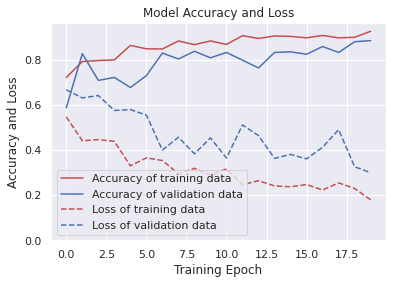

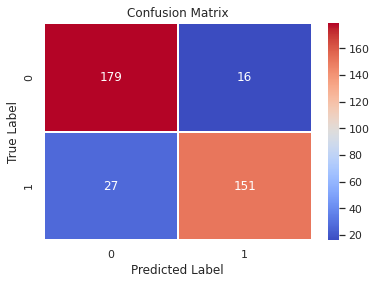

Accuracy: 0.8847
Precision: 0.8858
Recall: 0.8847
F1 Score: 0.8845
Cohen Kappa Score: 0.7683
Matthews Corrcoef: 0.7697
ROC AUC: 0.8831
		Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       195
           1       0.90      0.85      0.88       178

    accuracy                           0.88       373
   macro avg       0.89      0.88      0.88       373
weighted avg       0.89      0.88      0.88       373



In [103]:
y_pred_test = model2.predict(x_test)
max_y_pred_test = np.round(y_pred_test)
plot_model_accuracy_loss()
print_confusion_matrix()
print_performance_metrics()

### **CNN with 3 Layers**

In [104]:
baseModel = VGG19(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
headModel = baseModel.output

#Layer 1
headModel = Sequential()(headModel)
headModel = Convolution2D(128, (3, 3),input_shape=(224,224,3))(headModel)
headModel = Activation('softmax')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
#headModel = BatchNormalization()(headModel)

# Layer 2
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
#headModel = BatchNormalization()(headModel)

# Layer 3
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
headModel = BatchNormalization()(headModel)


# Flattenning
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(8, activation="relu")(headModel)
predictions = Dense(2, activation='sigmoid')(headModel)

from keras.models import Model
model3 = Model(inputs=baseModel.input, outputs=predictions)


for layer in baseModel.layers:
	layer.trainable = False
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model3.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

history = model3.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy']))

Train on 1707 samples, validate on 190 samples
Epoch 1/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.5796 - accuracy: 0.6863 - val_loss: 0.6971 - val_accuracy: 0.4421
Epoch 2/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.4891 - accuracy: 0.7622 - val_loss: 0.6532 - val_accuracy: 0.7237
Epoch 3/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.4382 - accuracy: 0.8081 - val_loss: 0.5992 - val_accuracy: 0.8184
Epoch 4/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.3841 - accuracy: 0.8348 - val_loss: 0.5926 - val_accuracy: 0.6816
Epoch 5/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.3880 - accuracy: 0.8234 - val_loss: 0.5453 - val_accuracy: 0.7447
Epoch 6/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.3372 - accuracy: 0.8553 - val_loss: 0.4173 - val_accuracy: 0.8263
Epoch 7/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.3240 - accu

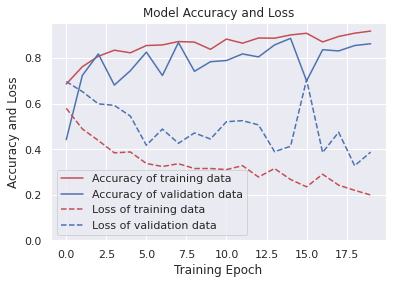

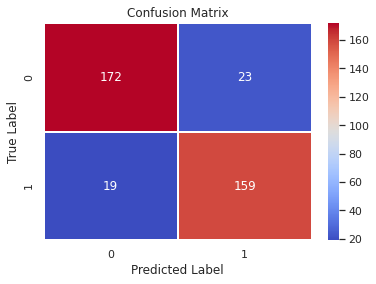

Accuracy: 0.8874
Precision: 0.8877
Recall: 0.8874
F1 Score: 0.8874
Cohen Kappa Score: 0.7746
Matthews Corrcoef: 0.7747
ROC AUC: 0.8877
		Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       195
           1       0.87      0.89      0.88       178

    accuracy                           0.89       373
   macro avg       0.89      0.89      0.89       373
weighted avg       0.89      0.89      0.89       373



In [105]:
y_pred_test = model3.predict(x_test)
max_y_pred_test = np.round(y_pred_test)
plot_model_accuracy_loss()
print_confusion_matrix()
print_performance_metrics()

### **CNN with 4 Layers**

In [106]:
baseModel = VGG19(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
headModel = baseModel.output

#Layer 1
headModel = Sequential()(headModel)
headModel = Convolution2D(128, (3, 3),input_shape=(224,224,3))(headModel)
headModel = Activation('softmax')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
#headModel = BatchNormalization()(headModel)

# Layer 2
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('softmax')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
#headModel = BatchNormalization()(headModel)

# Layer 3
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
#headModel = BatchNormalization()(headModel)

#Layer 4
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
#headModel = BatchNormalization()(headModel)


# Flattenning
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(8, activation="relu")(headModel)
predictions = Dense(2, activation='sigmoid')(headModel)

from keras.models import Model
model4 = Model(inputs=baseModel.input, outputs=predictions)


for layer in baseModel.layers:
	layer.trainable = False
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model4.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

history = model4.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy']))

Train on 1707 samples, validate on 190 samples
Epoch 1/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6930 - val_accuracy: 0.5684
Epoch 2/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5684
Epoch 3/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.6931 - accuracy: 0.4818 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 4/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.6934 - accuracy: 0.5103 - val_loss: 0.6922 - val_accuracy: 0.5684
Epoch 5/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.6165 - accuracy: 0.5764 - val_loss: 0.5486 - val_accuracy: 0.6474
Epoch 6/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.5049 - accuracy: 0.6834 - val_loss: 0.5700 - val_accuracy: 0.7421
Epoch 7/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.4971 - accu

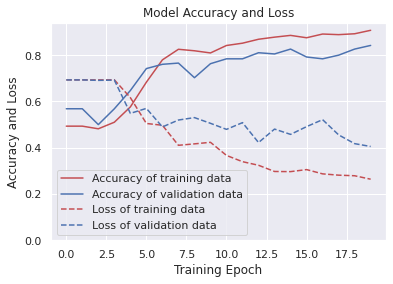

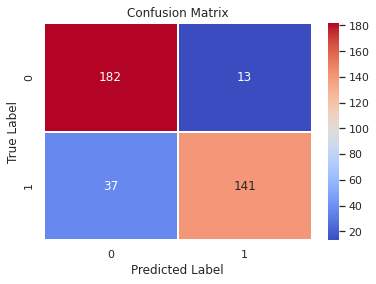

Accuracy: 0.866
Precision: 0.8714
Recall: 0.866
F1 Score: 0.865
Cohen Kappa Score: 0.7298
Matthews Corrcoef: 0.736
ROC AUC: 0.8627
		Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       195
           1       0.92      0.79      0.85       178

    accuracy                           0.87       373
   macro avg       0.87      0.86      0.86       373
weighted avg       0.87      0.87      0.86       373



In [107]:
y_pred_test = model4.predict(x_test)
max_y_pred_test = np.round(y_pred_test)
plot_model_accuracy_loss()
print_confusion_matrix()
print_performance_metrics()

### **CNN with 5 Layers**

In [108]:
baseModel = VGG19(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
headModel = baseModel.output

#Layer 1
headModel = Sequential()(headModel)
headModel = Convolution2D(128, (3, 3),input_shape=(224,224,3))(headModel)
headModel = Activation('softmax')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
#headModel = BatchNormalization()(headModel)

# Layer 2
headModel = Convolution2D(128, (3, 3) , padding ='same')(headModel)
headModel = Activation('softmax')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
headModel = BatchNormalization()(headModel)

# Layer 3
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
headModel = BatchNormalization()(headModel)

#Layer 4
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
headModel = BatchNormalization()(headModel)

#Layer 5
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
#headModel = BatchNormalization()(headModel)


# Flattenning
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(8, activation="relu")(headModel)
predictions = Dense(2, activation='sigmoid')(headModel)

from keras.models import Model
model5 = Model(inputs=baseModel.input, outputs=predictions)


for layer in baseModel.layers:
	layer.trainable = False
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model5.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

history = model5.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy']))

Train on 1707 samples, validate on 190 samples
Epoch 1/20
1707/1707 [==============================] - 7s 4ms/step - loss: 0.5922 - accuracy: 0.7006 - val_loss: 0.6961 - val_accuracy: 0.4316
Epoch 2/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.5182 - accuracy: 0.7654 - val_loss: 0.6977 - val_accuracy: 0.4316
Epoch 3/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.4736 - accuracy: 0.7768 - val_loss: 0.6872 - val_accuracy: 0.5684
Epoch 4/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.4677 - accuracy: 0.7739 - val_loss: 0.6856 - val_accuracy: 0.5684
Epoch 5/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.5338 - accuracy: 0.7270 - val_loss: 0.6863 - val_accuracy: 0.6658
Epoch 6/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.4314 - accuracy: 0.8102 - val_loss: 0.6636 - val_accuracy: 0.7289
Epoch 7/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.4286 - accu

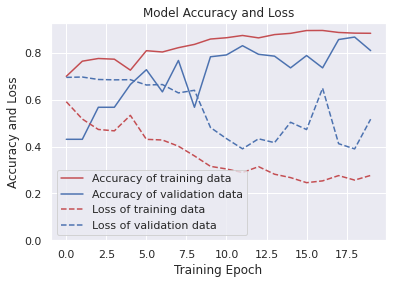

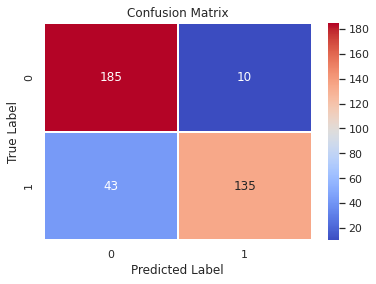

Accuracy: 0.8579
Precision: 0.8685
Recall: 0.8579
F1 Score: 0.8562
Cohen Kappa Score: 0.7129
Matthews Corrcoef: 0.7246
ROC AUC: 0.8536
		Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87       195
           1       0.93      0.76      0.84       178

    accuracy                           0.86       373
   macro avg       0.87      0.85      0.86       373
weighted avg       0.87      0.86      0.86       373



In [109]:
y_pred_test = model5.predict(x_test)
max_y_pred_test = np.round(y_pred_test)
plot_model_accuracy_loss()
print_confusion_matrix()
print_performance_metrics()

### **CNN with 6 Layers**

In [110]:
baseModel = VGG19(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
headModel = baseModel.output

#Layer 1
headModel = Sequential()(headModel)
headModel = Convolution2D(128, (3, 3),input_shape=(224,224,3))(headModel)
headModel = Activation('softmax')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
headModel = BatchNormalization()(headModel)

# Layer 2
headModel = Convolution2D(128, (3, 3) , padding ='same')(headModel)
headModel = Activation('softmax')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
headModel = BatchNormalization()(headModel)

# Layer 3
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
headModel = BatchNormalization()(headModel)

#Layer 4
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
headModel = BatchNormalization()(headModel)

#Layer 5
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
headModel = BatchNormalization()(headModel)

#Layer 6
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
#headModel = BatchNormalization()(headModel)


# Flattenning
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(8, activation="relu")(headModel)
predictions = Dense(2, activation='sigmoid')(headModel)

from keras.models import Model
model6 = Model(inputs=baseModel.input, outputs=predictions)


for layer in baseModel.layers:
	layer.trainable = False
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model6.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

history = model6.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy']))

Train on 1707 samples, validate on 190 samples
Epoch 1/20
1707/1707 [==============================] - 7s 4ms/step - loss: 0.6030 - accuracy: 0.6822 - val_loss: 0.6912 - val_accuracy: 0.5684
Epoch 2/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.4820 - accuracy: 0.7780 - val_loss: 0.6850 - val_accuracy: 0.5684
Epoch 3/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.5352 - accuracy: 0.7393 - val_loss: 0.6978 - val_accuracy: 0.4316
Epoch 4/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.4403 - accuracy: 0.7894 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 5/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.4001 - accuracy: 0.8146 - val_loss: 0.6818 - val_accuracy: 0.7579
Epoch 6/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.3622 - accuracy: 0.8345 - val_loss: 0.6913 - val_accuracy: 0.5105
Epoch 7/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.3462 - accu

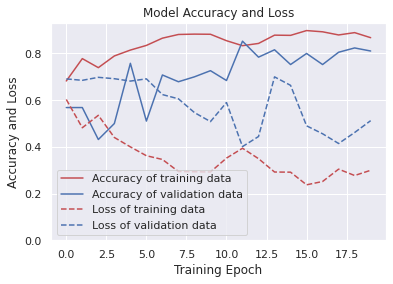

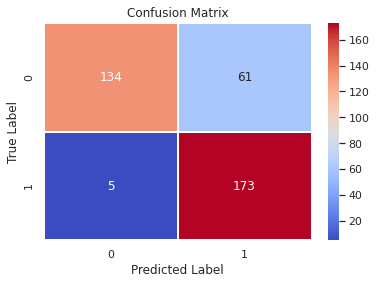

Accuracy: 0.8231
Precision: 0.8568
Recall: 0.8231
F1 Score: 0.8202
Cohen Kappa Score: 0.6502
Matthews Corrcoef: 0.6809
ROC AUC: 0.8295
		Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.80       195
           1       0.74      0.97      0.84       178

    accuracy                           0.82       373
   macro avg       0.85      0.83      0.82       373
weighted avg       0.86      0.82      0.82       373



In [111]:
y_pred_test = model6.predict(x_test)
max_y_pred_test = np.round(y_pred_test)
plot_model_accuracy_loss()
print_confusion_matrix()
print_performance_metrics()

### **CNN with 7 Layers**

In [112]:
baseModel = VGG19(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
headModel = baseModel.output

#Layer 1
headModel = Sequential()(headModel)
headModel = Convolution2D(128, (3, 3),input_shape=(224,224,3))(headModel)
headModel = Activation('softmax')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
headModel = BatchNormalization()(headModel)

# Layer 2
headModel = Convolution2D(128, (3, 3) , padding ='same')(headModel)
headModel = Activation('softmax')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
headModel = BatchNormalization()(headModel)

# Layer 3
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
headModel = BatchNormalization()(headModel)

#Layer 4
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
headModel = BatchNormalization()(headModel)

#Layer 5
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
headModel = BatchNormalization()(headModel)

#Layer 6
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
headModel = BatchNormalization()(headModel)

#Layer 7
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
#headModel = BatchNormalization()(headModel)


# Flattenning
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(8, activation="relu")(headModel)
predictions = Dense(2, activation='sigmoid')(headModel)

from keras.models import Model
model7 = Model(inputs=baseModel.input, outputs=predictions)


for layer in baseModel.layers:
	layer.trainable = False
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model7.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

history = model7.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy']))

Train on 1707 samples, validate on 190 samples
Epoch 1/20
1707/1707 [==============================] - 7s 4ms/step - loss: 0.6273 - accuracy: 0.6573 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 2/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.5094 - accuracy: 0.7624 - val_loss: 0.7074 - val_accuracy: 0.4316
Epoch 3/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.4467 - accuracy: 0.7944 - val_loss: 0.6940 - val_accuracy: 0.4316
Epoch 4/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.4447 - accuracy: 0.8037 - val_loss: 0.6826 - val_accuracy: 0.5684
Epoch 5/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.4510 - accuracy: 0.7847 - val_loss: 0.6839 - val_accuracy: 0.6421
Epoch 6/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.3722 - accuracy: 0.8380 - val_loss: 0.6639 - val_accuracy: 0.5684
Epoch 7/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.3579 - accu

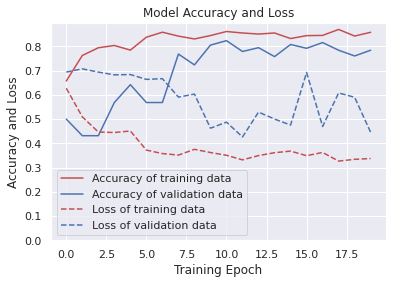

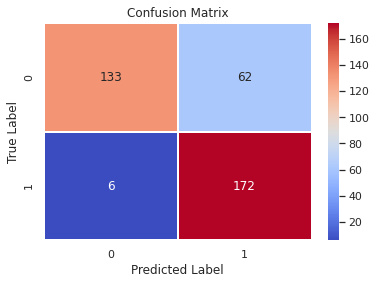

Accuracy: 0.8177
Precision: 0.851
Recall: 0.8177
F1 Score: 0.8148
Cohen Kappa Score: 0.6396
Matthews Corrcoef: 0.6698
ROC AUC: 0.8242
		Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.68      0.80       195
           1       0.74      0.97      0.83       178

    accuracy                           0.82       373
   macro avg       0.85      0.82      0.82       373
weighted avg       0.85      0.82      0.81       373



In [113]:
y_pred_test = model7.predict(x_test)
max_y_pred_test = np.round(y_pred_test)
plot_model_accuracy_loss()
print_confusion_matrix()
print_performance_metrics()

### **CNN with 8 Layers**

In [114]:
baseModel = VGG19(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
headModel = baseModel.output

#Layer 1
headModel = Sequential()(headModel)
headModel = Convolution2D(128, (3, 3),input_shape=(224,224,3))(headModel)
headModel = Activation('softmax')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
#headModel = BatchNormalization()(headModel)

# Layer 2
headModel = Convolution2D(128, (3, 3) , padding ='same')(headModel)
headModel = Activation('softmax')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
headModel = BatchNormalization()(headModel)

# Layer 3
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
headModel = BatchNormalization()(headModel)

#Layer 4
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
headModel = BatchNormalization()(headModel)

#Layer 5
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
headModel = BatchNormalization()(headModel)

#Layer 6
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
headModel = BatchNormalization()(headModel)

#Layer 7
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
headModel = BatchNormalization()(headModel)

#Layer 8
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
#headModel = BatchNormalization()(headModel)


# Flattenning
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(8, activation="relu")(headModel)
predictions = Dense(2, activation='sigmoid')(headModel)

from keras.models import Model
model8 = Model(inputs=baseModel.input, outputs=predictions)


for layer in baseModel.layers:
	layer.trainable = False
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model8.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

history = model8.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy']))

Train on 1707 samples, validate on 190 samples
Epoch 1/20
1707/1707 [==============================] - 8s 4ms/step - loss: 0.6255 - accuracy: 0.6470 - val_loss: 0.6999 - val_accuracy: 0.4316
Epoch 2/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.5932 - accuracy: 0.6927 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.5031 - accuracy: 0.7569 - val_loss: 0.7109 - val_accuracy: 0.4316
Epoch 4/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.4361 - accuracy: 0.8052 - val_loss: 0.6927 - val_accuracy: 0.5632
Epoch 5/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.4759 - accuracy: 0.7859 - val_loss: 0.7387 - val_accuracy: 0.4316
Epoch 6/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.5069 - accuracy: 0.7522 - val_loss: 0.6885 - val_accuracy: 0.5684
Epoch 7/20
1707/1707 [==============================] - 6s 4ms/step - loss: 0.4867 - accu

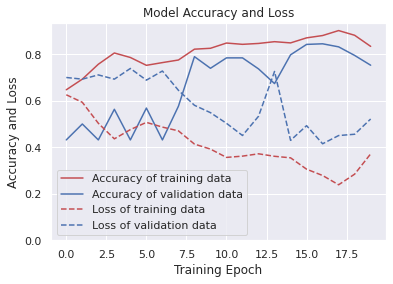

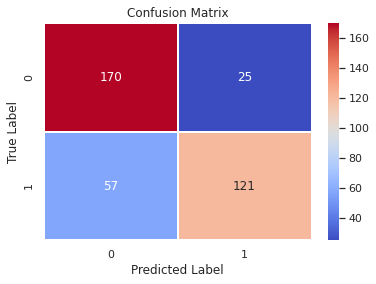

Accuracy: 0.7802
Precision: 0.787
Recall: 0.7802
F1 Score: 0.7776
Cohen Kappa Score: 0.5559
Matthews Corrcoef: 0.5645
ROC AUC: 0.7758
		Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81       195
           1       0.83      0.68      0.75       178

    accuracy                           0.78       373
   macro avg       0.79      0.78      0.78       373
weighted avg       0.79      0.78      0.78       373



In [115]:
y_pred_test = model8.predict(x_test)
max_y_pred_test = np.round(y_pred_test)
plot_model_accuracy_loss()
print_confusion_matrix()
print_performance_metrics()